In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('house price dataset.csv')

# Selecting the features and target
X = data[['LotArea']]  # Independent variable
y = data['SalePrice']  # Dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a DMatrix, which is a specialized data structure that XGBoost uses for more efficiency and performance
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Specifying parameters for the model
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Training the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Making predictions
y_pred = bst.predict(dtest)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean squared error: {mse:.2f}")
print(f"R^2 score: {r2:.2f}")

Saving house price dataset.csv to house price dataset.csv
Mean squared error: 5954146331.59
R^2 score: 0.22


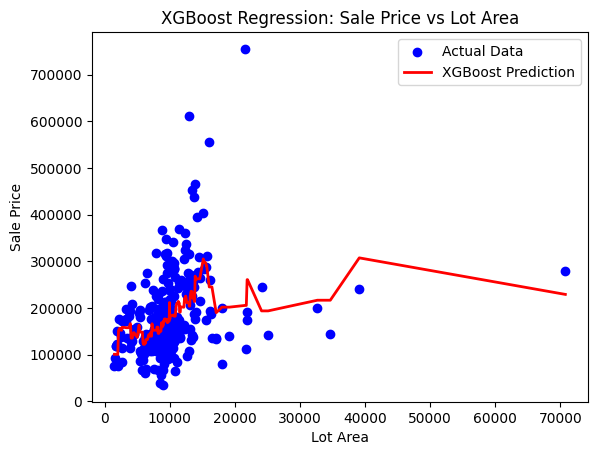

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting the test data and predictions for better visualization
sorted_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values.flatten()[sorted_indices]
y_test_sorted = y_test.values.flatten()[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting the test data
plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='XGBoost Prediction')

# Adding labels and title
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('XGBoost Regression: Sale Price vs Lot Area')

# Adding a legend
plt.legend()

# Display the plot
plt.show()